In [1]:
import keras
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

2024-04-01 23:54:08.568989: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 23:54:08.600724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 23:54:08.600749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 23:54:08.601809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-01 23:54:08.607218: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 23:54:08.607797: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [24]:
from keras.layers import Dense
from keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

X = [-40, -10, 0, 8, 15, 22, 38]
y = [-40, 14, 32, 46, 59, 72, 100]

model = keras.Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(1, ), ))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

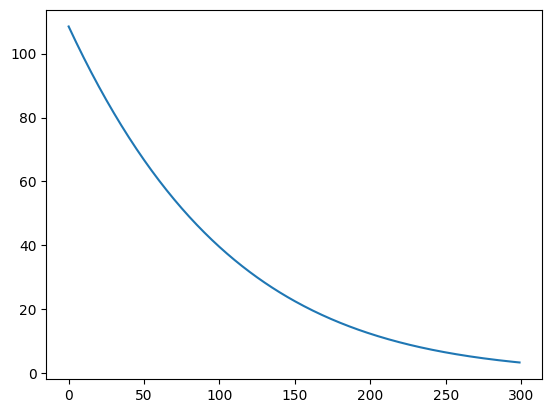

In [27]:
history = model.fit(X, y, verbose=0, epochs=300)
plt.plot(history.history['loss'])

In [28]:
model.get_weights()

[array([[1.8139634]], dtype=float32), array([30.108349], dtype=float32)]